# Exploratory Data Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('../data/eda.csv')
df.drop(['ID','MRI_ID'],axis=1, inplace=True)
sns.set_theme()

In [45]:
visit_1_df = pd.read_csv('../data/tabular/visit-1.csv')
visit_2_df = pd.read_csv('../data/tabular/visit-2.csv')
visit_3_df = pd.read_csv('../data/tabular/visit-3.csv')
visit_4_df = pd.read_csv('../data/tabular/visit-4.csv')
visit_5_df = pd.read_csv('../data/tabular/visit-5.csv')

### Missing Values in each dataset

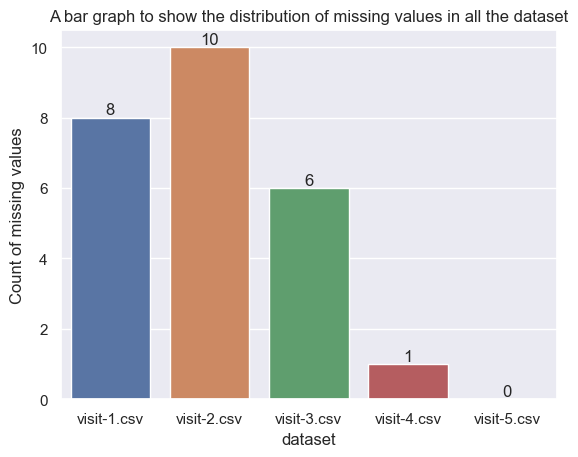

In [49]:
dataframes = [visit_1_df,visit_2_df,visit_3_df,visit_4_df,visit_5_df]
visit_names = ['visit-1.csv', 'visit-2.csv', 'visit-3.csv', 'visit-4.csv', 'visit-5.csv']

def return_missing_value_array(dataframes):
    missing_value_list = []
    for dataframe in dataframes:
        missing_value_list.append(dataframe.isna().sum().sum())
    return missing_value_list

barplot = sns.barplot(x=visit_names, y=return_missing_value_array(dataframes), hue=visit_names)

barplot.set_title('A bar graph to show the distribution of missing values in all the dataset')
barplot.set_xlabel('dataset')
barplot.set_ylabel('Count of missing values')

for i in barplot.containers:
    barplot.bar_label(i,)

barplot.figure.savefig('barplot-datasets-missing-values.png', dpi=600)


### Missing values per column in merged dataset

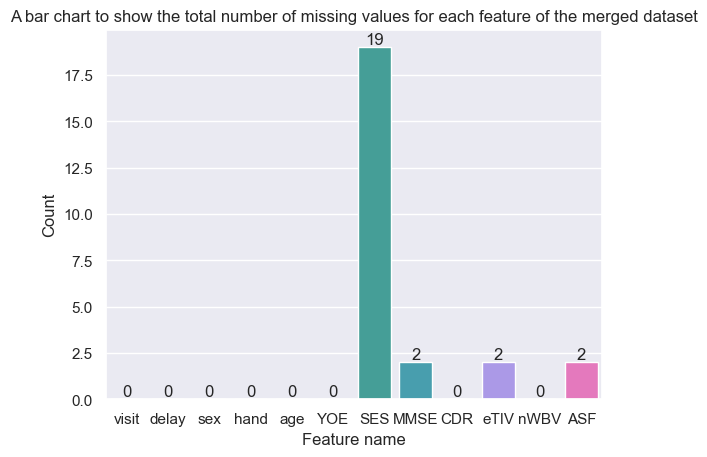

In [50]:

features = df.columns

def return_missing_value_array_features(features):
    missing_values = []

    for feature in features:
        missing_values.append(df[feature].isna().sum())

    return missing_values


barplot = sns.barplot(x=features, y=return_missing_value_array_features(features), hue=features)
barplot.set_title('A bar chart to show the total number of missing values for each feature of the merged dataset')
barplot.set_xlabel('Feature name')
barplot.set_ylabel('Count')

for i in barplot.containers:
    barplot.bar_label(i,)

barplot.figure.savefig('barplot-datasets-missing-values-in-merged.png', dpi=600)

In [53]:
df = pd.read_pickle('../data/processed/proecessed.pkl.gz')

df

,ID,MRI_ID,visit,delay,sex,hand,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF,CDR_rating,MMSE_labels,dementia
0,1,1_MR1,1,0,1,1,87,14,2.0,27.0,none,1987.0,0.696,0.883,0,None,0
1,2,2_MR1,1,0,1,1,75,12,2.0,23.0,very mild,1678.0,0.736,1.046,1,Mild,1
2,4,4_MR1,1,0,0,1,88,18,3.0,28.0,none,1215.0,0.710,1.444,0,None,0
3,5,5_MR1,1,0,1,1,80,12,4.0,28.0,none,1689.0,0.712,1.039,0,None,0
4,7,7_MR1,1,0,1,1,71,16,2.0,28.0,very mild,1357.0,0.748,1.293,1,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,36,36_MR5,5,2369,0,1,75,13,4.0,29.0,none,1349.0,0.778,1.301,0,None,0
369,48,48_MR5,5,1233,1,1,69,16,1.0,4.0,mild,1701.0,0.676,1.032,2,Severe,1
370,70,70_MR5,5,2386,1,1,86,17,1.0,30.0,none,1720.0,0.705,1.020,0,None,0
371,73,73_MR5,5,2517,0,1,77,14,3.0,29.0,none,1504.0,0.769,1.167,0,None,0


### Correlation matrix heatmap

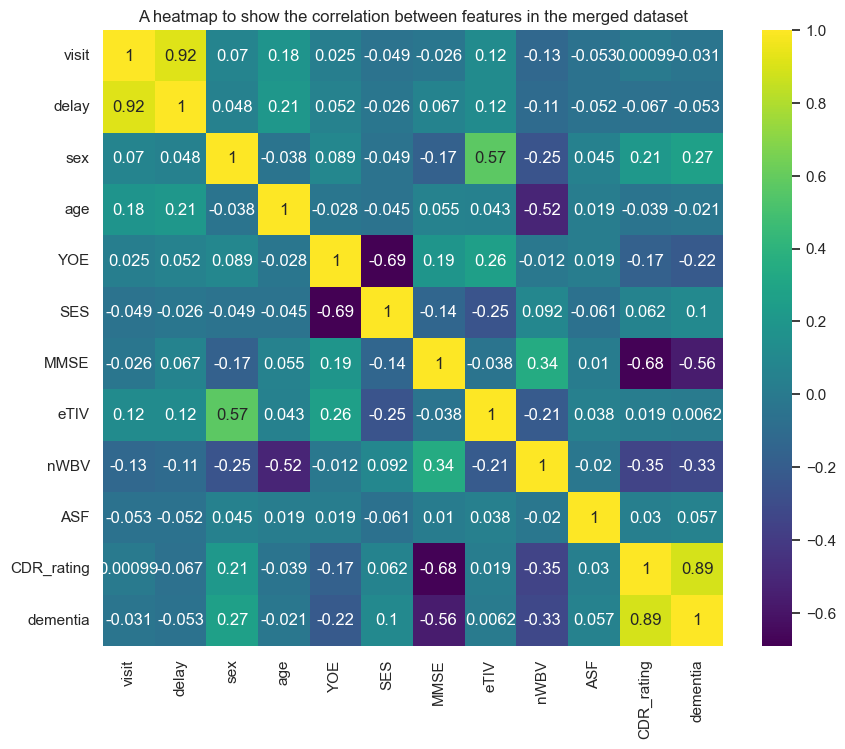

In [55]:
corr_df = df.drop(columns=['ID','MRI_ID','CDR','MMSE_labels','hand'],axis=1)

corr_df = corr_df.corr()

plt.figure(figsize=(10,8))

heatmap = sns.heatmap(corr_df, annot=True, cmap='viridis')

heatmap.set_title('A heatmap to show the correlation between features in the merged dataset')

heatmap.figure.savefig('corr-heatmap.png', dpi=600)

### Boxplot between male and female

In [ ]:
df['ASF'].describe()

count    373.000000
mean       1.468944
std        5.273012
min        0.876000
25%        1.104000
50%        1.197000
75%        1.293000
max      103.000000
Name: ASF, dtype: float64

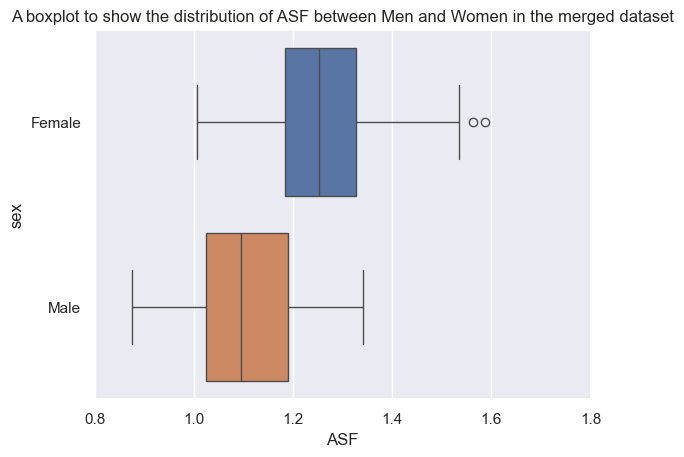

In [56]:
df['sex'] = df['sex'].replace({0:'Female',1:'Male'})

boxplot = sns.boxplot(data=df ,x='ASF', y='sex', hue='sex')
boxplot.set_xlim(0.8,1.8)
boxplot.set_title('A boxplot to show the distribution of ASF between Men and Women in the merged dataset')

boxplot.figure.savefig('box-plot-sex-asf.png', dpi=600)

### Line plot to show nWBV as age increases

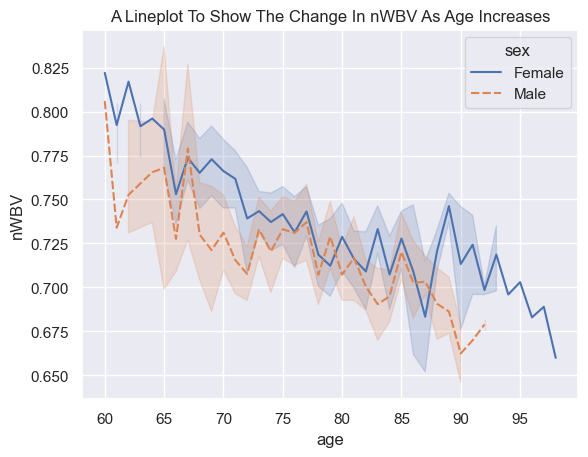

In [57]:
lineplot = sns.lineplot(data=df, x='age', y='nWBV', hue='sex', style='sex')

lineplot.set_title('A Lineplot To Show The Change In nWBV As Age Increases')

lineplot.figure.savefig('lineplot-age-nWBV.png', dpi=600)

### Statistical Overview of Each Feature

In [60]:
from IPython.display import HTML

df = pd.read_csv('../data/eda.csv')
x = df.describe()


x.to_csv

,ID,visit,delay,age,YOE,SES,MMSE,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,371.000000,373.000000,371.000000
mean,90.844504,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,1488.652291,0.729568,1.470480
std,53.375546,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,176.398659,0.037135,5.287202
min,1.000000,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.876000
25%,46.000000,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,1357.500000,0.700000,1.101500
50%,88.000000,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,1471.000000,0.729000,1.198000
75%,137.000000,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,1598.000000,0.756000,1.294500
max,186.000000,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,103.000000
